In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 500)

import keggler as kg
from helpers import *

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tqdm import tqdm

import gc
gc.enable()

import warnings
warnings.simplefilter(action='ignore', category=Warning)

import os, psutil
import glob

# Set up a logger to dump messages to both log file and notebook
import logging as logging
def ini_log(filename):
    logger = logging.getLogger(__name__)
    ## avoid multiple printouts due to same handlers added several times
    if not logger.handlers:
        logger.setLevel(logging.DEBUG)

        handlers = [#logging.StreamHandler(None), 
            logging.FileHandler(filename, 'a')
        ]

        fmt=logging.Formatter('%(asctime)-15s: %(levelname)s  %(message)s')
        for h in handlers:
            h.setFormatter(fmt)
            logger.addHandler(h)
    return logger
        
log = ini_log('out.log')

#PATH='data_mini/'
#prefix='_mini'

PATH='data/'
prefix=''

n_files=4

print(os.listdir(PATH))


['submissions', 'test_set', 'track_features', 'training_set']


In [2]:
data_path = 'data/' # point this to your data folder
trn_path = data_path + '/training_set/'

# trn_input_logs = sorted(glob.glob(trn_path + "outDD_v1*.csv.gz"))
trn_input_logs = sorted(glob.glob(trn_path + "outDD_v2_0*.h5"))
ys   = sorted(glob.glob(trn_path + "y_0*.h5"))

In [3]:
trn_input_logs[:]

['data//training_set/outDD_v2_00.h5',
 'data//training_set/outDD_v2_01.h5',
 'data//training_set/outDD_v2_02.h5',
 'data//training_set/outDD_v2_03.h5',
 'data//training_set/outDD_v2_04.h5',
 'data//training_set/outDD_v2_05.h5',
 'data//training_set/outDD_v2_06.h5',
 'data//training_set/outDD_v2_07.h5',
 'data//training_set/outDD_v2_08.h5',
 'data//training_set/outDD_v2_09.h5']

# Read in the data

In [4]:
df_trn = pd.concat([read_log(f) for f in trn_input_logs[:n_files]], axis=0, ignore_index=True)
df_trn.rename({'not_skipped': 'skip_4'}, axis=1, inplace=True)
gc.collect()

from sklearn.preprocessing import LabelEncoder
df_trn['session_id'] = LabelEncoder().fit_transform(df_trn['session_id'])
df_trn['session_id'] = df_trn['session_id'].astype(np.uint32)

In [5]:
psutil.Process(os.getpid()).memory_info().rss / 1024**2

1039.640625

In [6]:
df_trn.memory_usage(deep=True).sum()/1024**2

765.8088464736938

In [7]:
df_trn.dtypes

session_id                          uint32
session_position                      int8
session_length                        int8
skip_1                                int8
skip_2                                int8
skip_3                                int8
skip_4                                int8
context_switch                       uint8
no_pause_before_play                  int8
short_pause_before_play               int8
long_pause_before_play                int8
hist_user_behavior_is_shuffle        uint8
hour_of_day                           int8
premium                               int8
context_type                         uint8
hist_user_behavior_reason_start       int8
hist_user_behavior_reason_end         int8
duration                           float16
release_year                         int16
us_popularity_estimate             float16
acousticness                       float16
beat_strength                      float16
bounciness                         float16
danceabilit

In [8]:
df_trn.memory_usage(deep=True)/1024**2

Index                               0.000076
session_id                         50.216969
session_position                   12.554242
session_length                     12.554242
skip_1                             12.554242
skip_2                             12.554242
skip_3                             12.554242
skip_4                             12.554242
context_switch                     12.554242
no_pause_before_play               12.554242
short_pause_before_play            12.554242
long_pause_before_play             12.554242
hist_user_behavior_is_shuffle      12.554242
hour_of_day                        12.554242
premium                            12.554242
context_type                       12.554242
hist_user_behavior_reason_start    12.554242
hist_user_behavior_reason_end      12.554242
duration                           25.108484
release_year                       25.108484
us_popularity_estimate             25.108484
acousticness                       25.108484
beat_stren

In [9]:
df_trn.shape

(13164077, 38)

In [10]:
df_trn.head(21)

,session_id,session_position,session_length,skip_1,skip_2,skip_3,skip_4,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence
0,0,1,20,0,0,0,1,0,0,0,0,1,16,1,1,1,1,180.125,2018,99.9375,0.015854,0.438477,0.473389,0.653320,7.660156,0.553223,1.035156,3.484726e-03,1,0.678711,-6.578125,0.546875,0,0.320557,0.069702,134.0000,4,0.152222
1,0,2,20,0,0,0,1,0,1,0,0,1,16,1,1,1,1,236.750,2018,99.8750,0.061798,0.654785,0.735840,0.877441,11.312500,0.727051,1.025391,1.192093e-07,7,0.104309,-5.320312,0.824707,1,0.131348,0.061157,130.0000,4,0.337158
2,0,3,20,0,0,0,1,0,1,0,0,1,16,1,1,1,1,231.250,2018,100.0000,0.354004,0.532227,0.540527,0.679688,8.062500,0.562988,1.029297,0.000000e+00,10,0.135742,-5.843750,0.774414,0,0.296875,0.045349,145.0000,4,0.373779
3,0,4,20,0,0,0,1,0,1,0,0,1,16,1,1,1,1,169.875,2018,100.0000,0.769043,0.641602,0.729004,0.864746,11.289062,0.529297,0.993652,6.616116e-06,1,0.103699,-7.757812,0.630859,0,0.603027,0.229980,112.0000,4,0.649414
4,0,5,20,0,0,0,1,0,1,0,0,1,16,1,1,1,1,210.500,2018,100.0000,0.006603,0.732422,0.794922,0.857910,12.179688,0.649902,1.000977,2.086163e-06,8,0.120850,-4.917969,0.759277,0,0.170166,0.240967,147.0000,4,0.652832
5,0,6,20,0,0,1,0,0,1,0,0,1,16,1,1,1,2,216.750,2018,100.0000,0.098328,0.548828,0.658203,0.596680,10.414062,0.557129,1.027344,5.960464e-08,1,0.056488,-7.523438,0.385010,1,0.440430,0.133545,133.2500,5,0.661133
6,0,7,20,1,1,1,0,0,1,0,0,1,16,1,1,2,2,186.500,2018,99.8750,0.449707,0.487793,0.608398,0.557617,9.835938,0.469238,1.033203,0.000000e+00,6,0.111328,-7.808594,0.157593,0,0.675293,0.409912,104.4375,4,0.109436
7,0,8,20,1,1,1,0,0,1,0,0,1,16,1,1,2,2,214.000,2018,97.2500,0.017624,0.649414,0.682617,0.489502,9.898438,0.715332,1.049805,2.527237e-05,1,0.114807,-6.960938,0.354248,0,0.456787,0.103699,83.0625,4,0.389893
8,0,9,20,0,1,1,0,0,1,0,0,1,16,1,1,2,2,218.250,2018,100.0000,0.030121,0.818848,0.879883,0.964355,15.039062,0.555176,1.046875,5.669594e-04,5,0.128296,-6.246094,0.857910,1,0.102722,0.049866,130.0000,4,0.338379
9,0,10,20,1,1,1,0,0,1,0,0,1,16,1,1,2,2,60.000,2018,99.9375,0.332520,0.751465,0.843262,0.914062,14.460938,0.239258,1.041016,4.131794e-04,4,0.119019,-8.593750,0.622070,1,0.355957,0.154663,100.2500,4,0.257568


# EDA

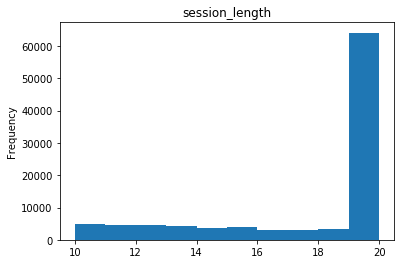

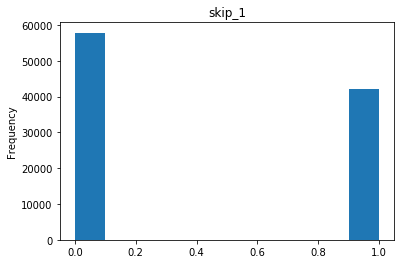

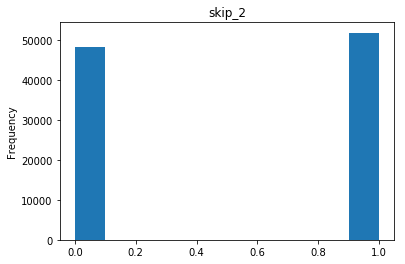

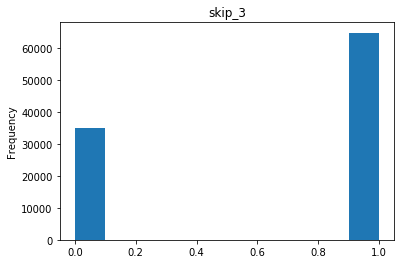

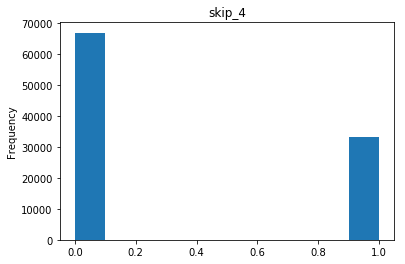

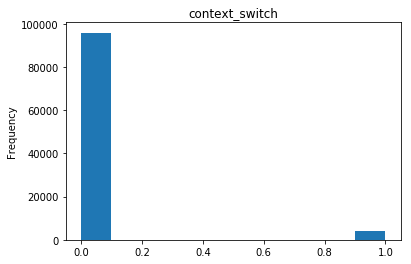

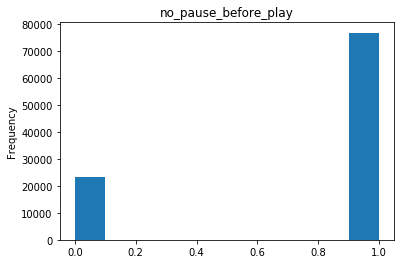

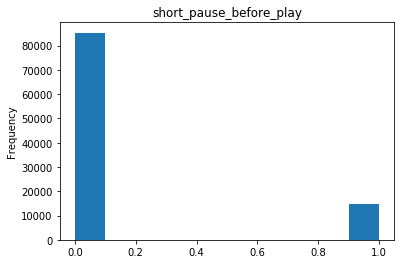

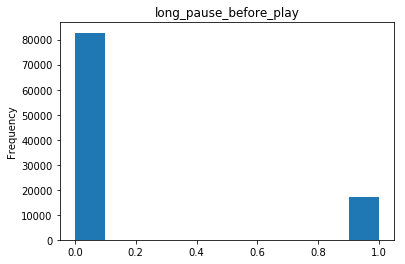

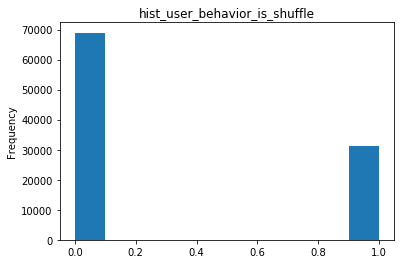

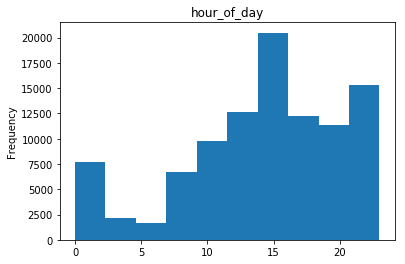

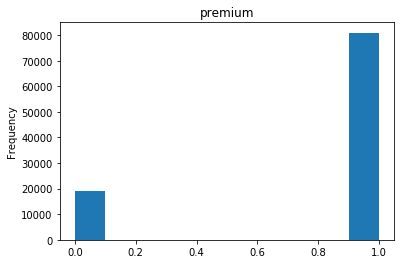

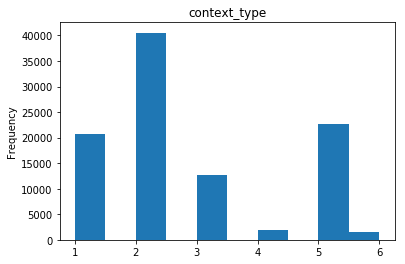

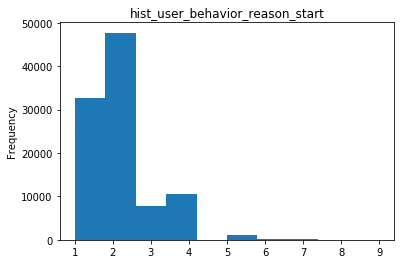

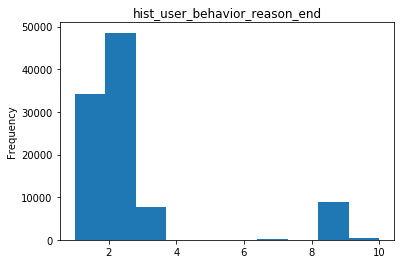

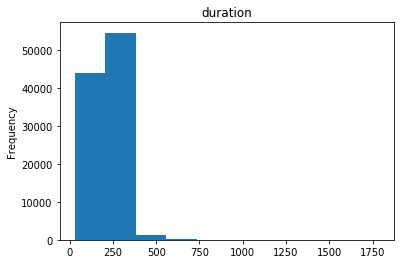

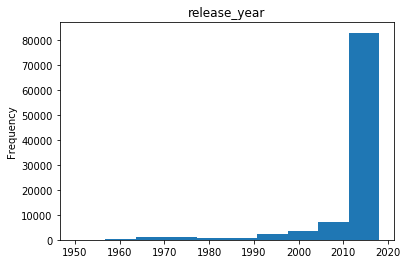

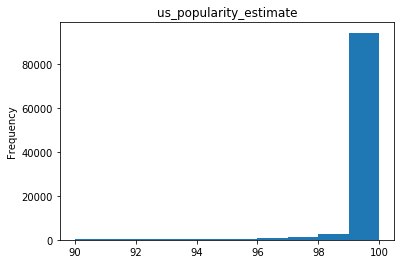

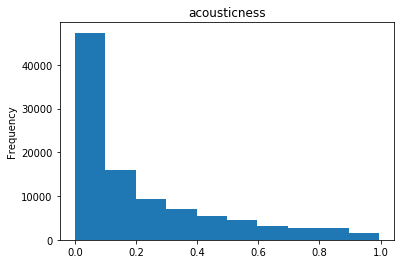

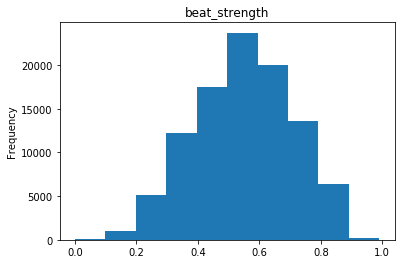

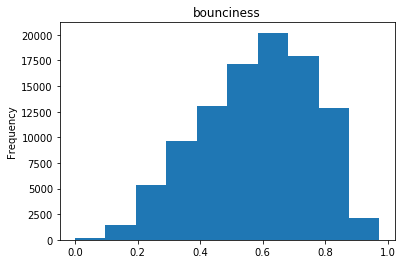

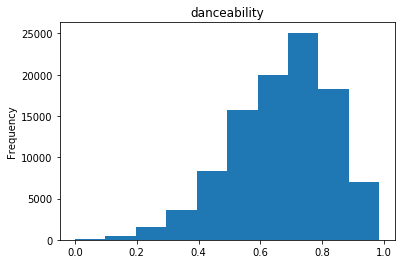

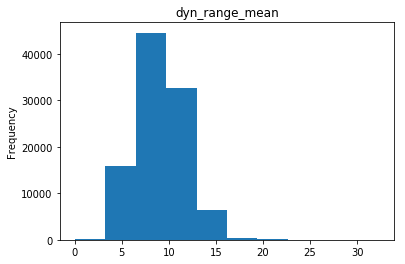

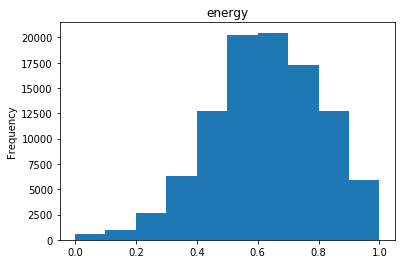

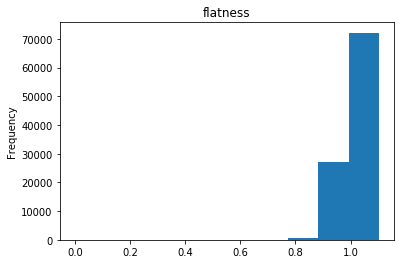

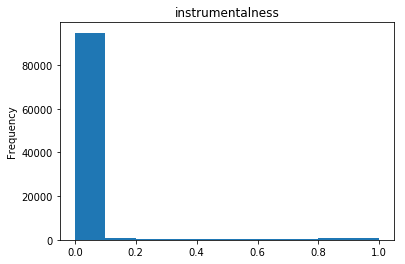

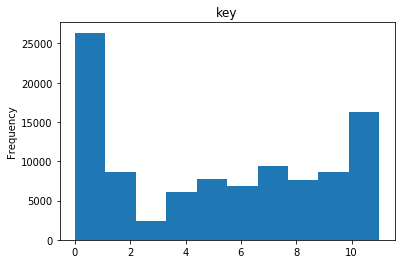

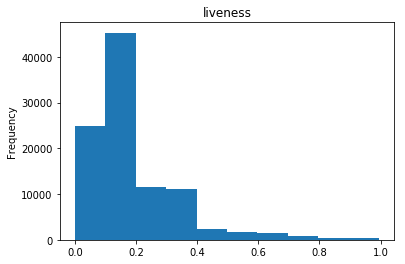

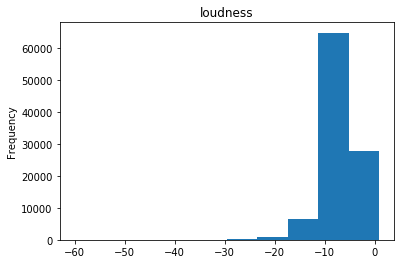

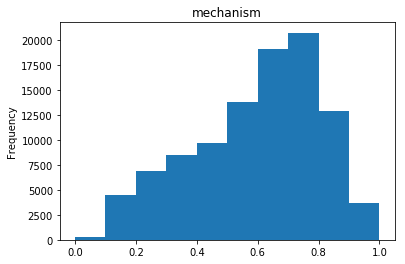

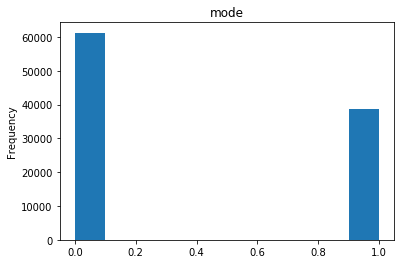

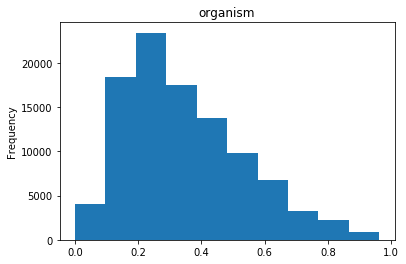

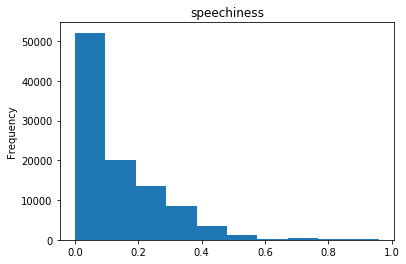

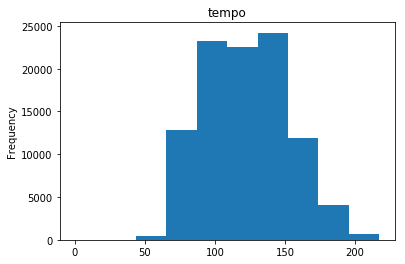

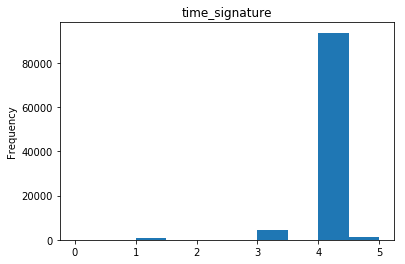

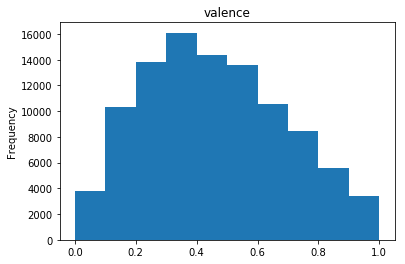

In [11]:
for c in df_trn.columns[2:]:
    df_trn[c].iloc[:100000].plot.hist()
    plt.yscale('linear')
    plt.title(c)
    plt.show()

# X / y split

In [12]:
df_trn.columns

Index(['session_id', 'session_position', 'session_length', 'skip_1', 'skip_2',
       'skip_3', 'skip_4', 'context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_is_shuffle', 'hour_of_day', 'premium',
       'context_type', 'hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end', 'duration', 'release_year',
       'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range_mean', 'energy', 'flatness',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mechanism', 'mode',
       'organism', 'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

User level (already in `last`):  `'hour_of_day', 'premium'`
 
 Median: `'duration', 'release_year', 'us_popularity_estimate', 
 'context_type', 'hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end'`

In [13]:
X_trn, y_trn, X_trk = get_XY(df_trn.iloc[:], aggs, reset_index=True, 
                      list_musik_qualities_=list_musik_qualities,#['valence'], 
                      aggs_music_qualities_=aggs_music_qualities,
                             i_=0)
                       #i_=list(range(5)))
gc.collect()

468

In [14]:
psutil.Process(os.getpid()).memory_info().rss / 1024**2

2118.34765625

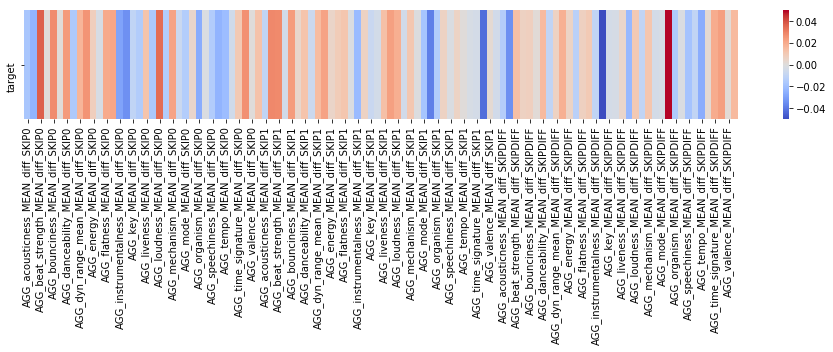

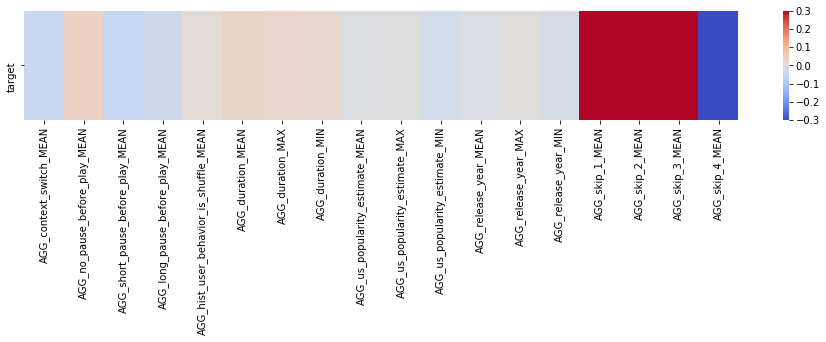

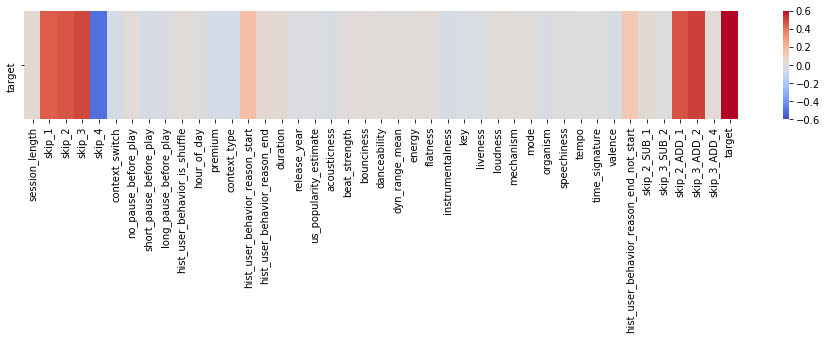

In [15]:
XY_corr = pd.concat([X_trn,X_trk[0],y_trn[0].rename('target')], axis=1).iloc[:10000].corr()
for cols, (vmin,vmax) in [
    ([c for c in XY_corr.columns if '_SKIP' in c],(-0.05, 0.05)),
    ([c for c in XY_corr.columns if '_SKIP' not in c and c.startswith('AGG_')],(-0.30,0.30)),
    ([c for c in XY_corr.columns if not c.startswith('AGG_')], (-0.6,0.6)),
]:
    _ = plt.figure(figsize=(16,2))
    _ = sns.heatmap(XY_corr[['target']].loc[cols,:].T, vmax=vmax, vmin=vmin, cmap='coolwarm')


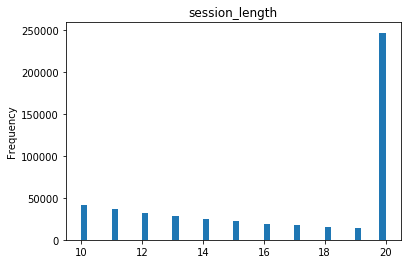

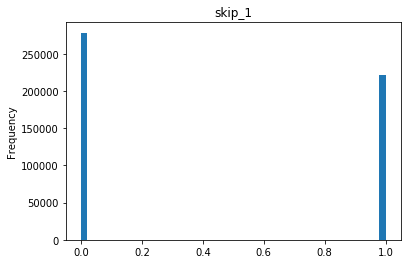

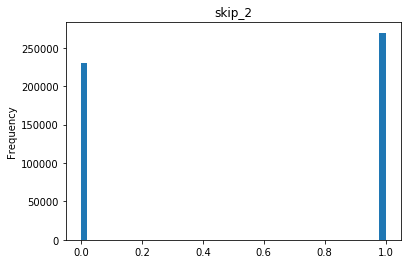

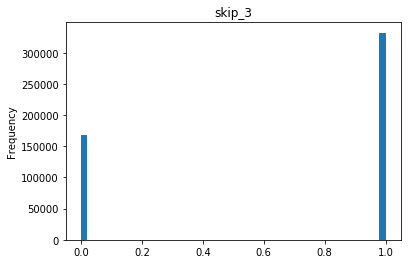

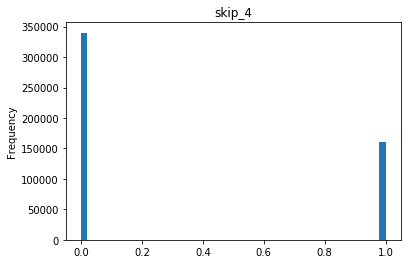

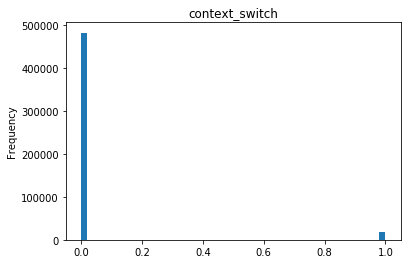

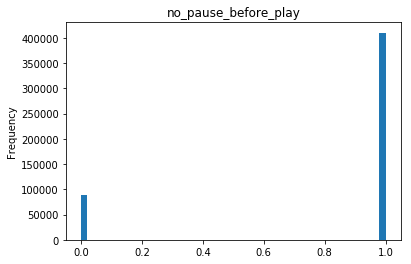

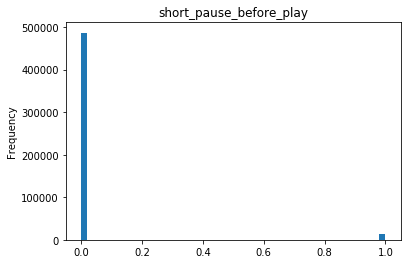

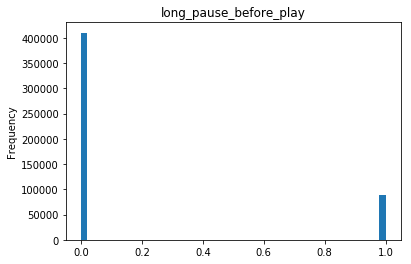

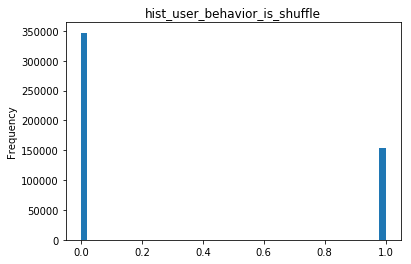

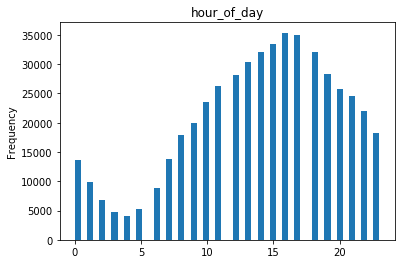

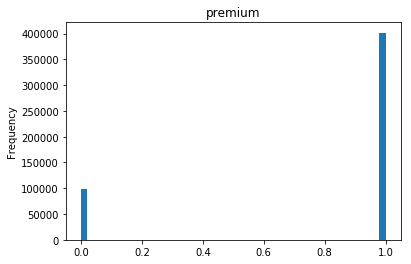

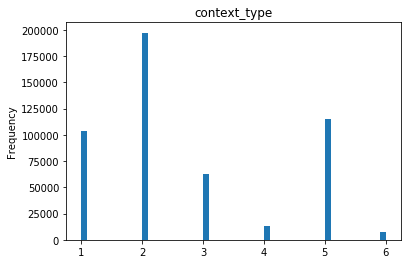

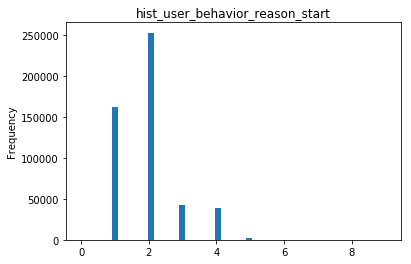

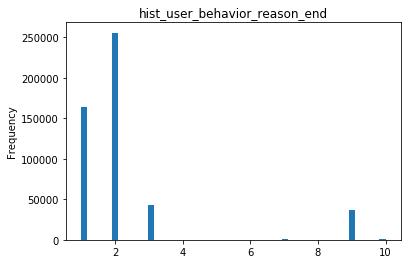

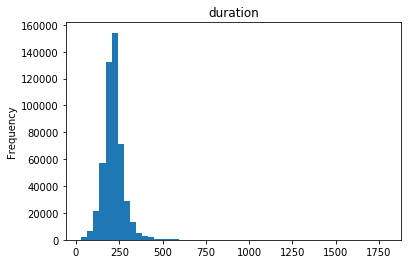

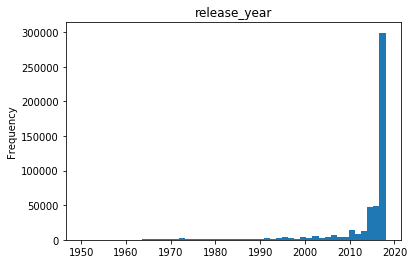

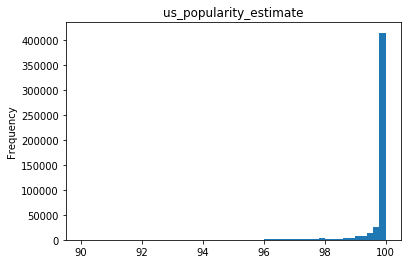

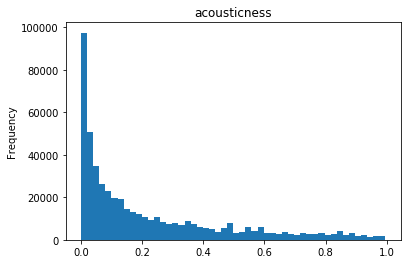

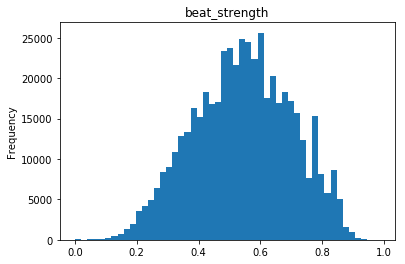

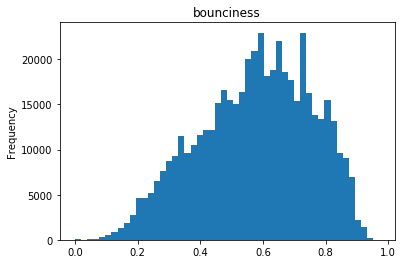

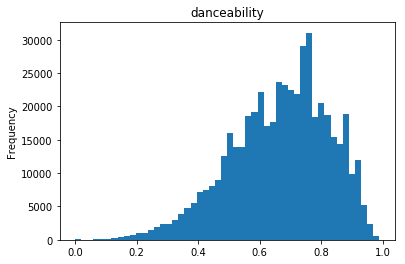

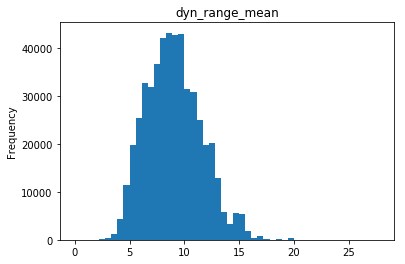

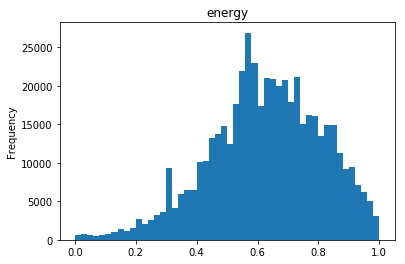

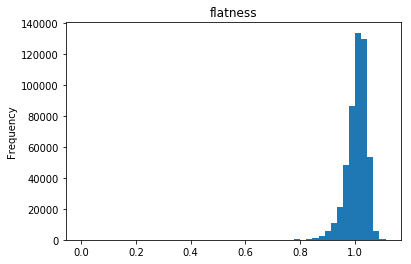

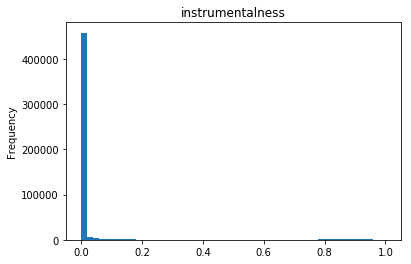

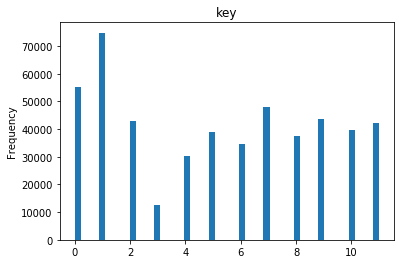

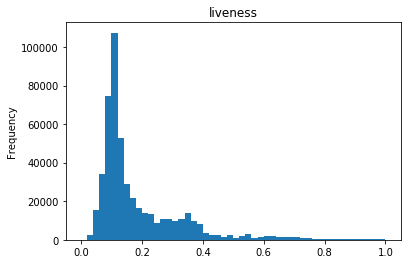

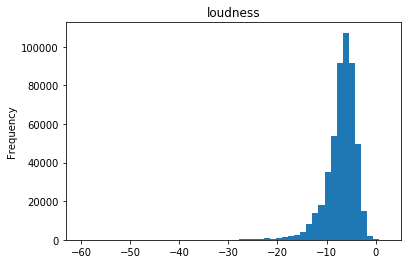

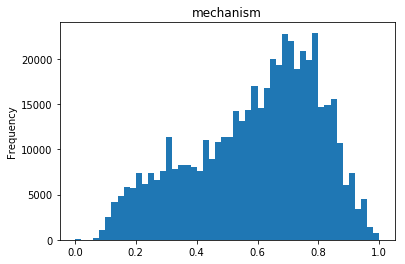

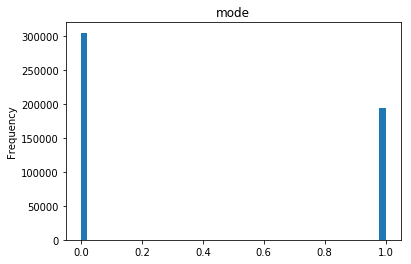

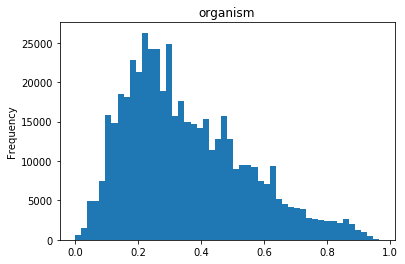

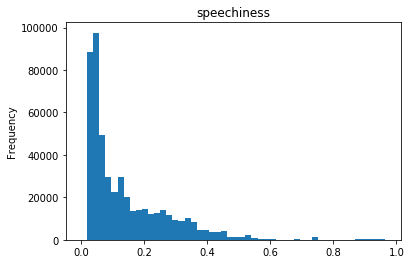

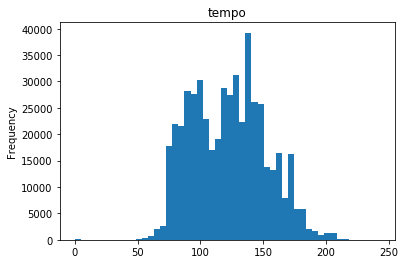

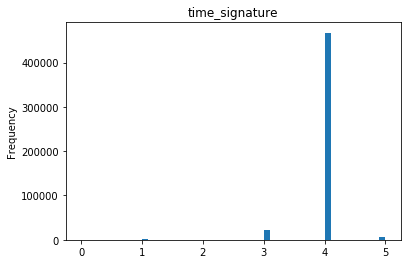

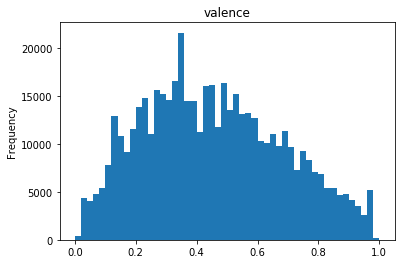

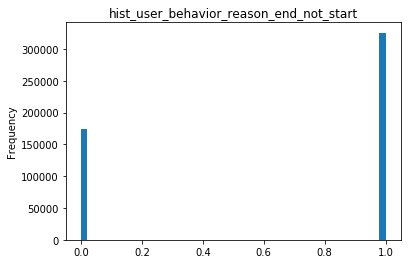

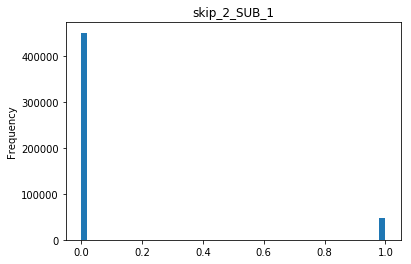

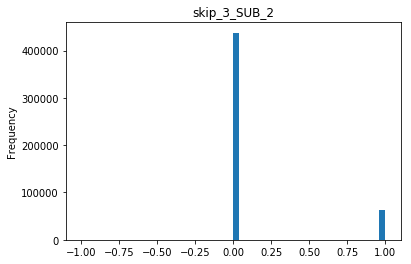

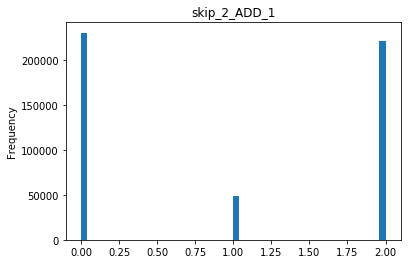

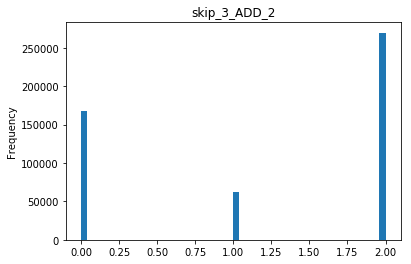

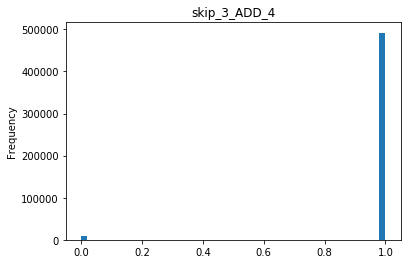

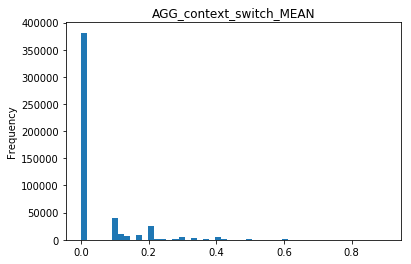

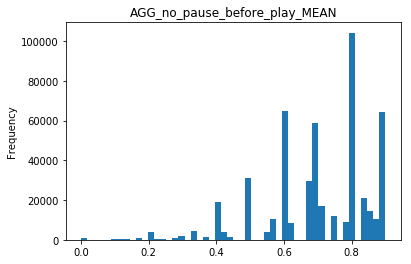

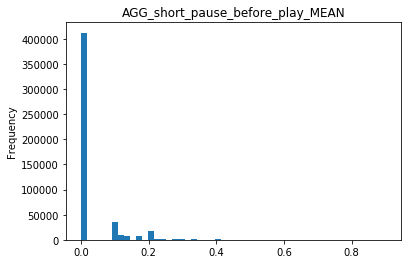

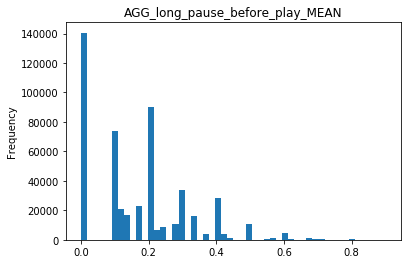

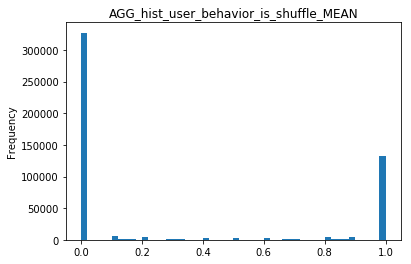

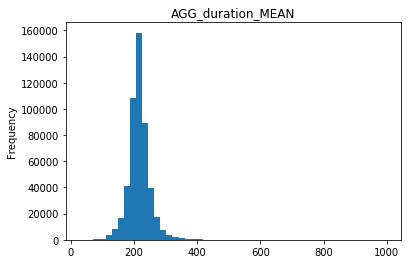

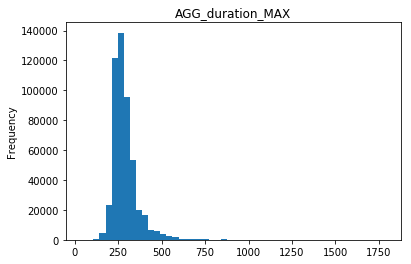

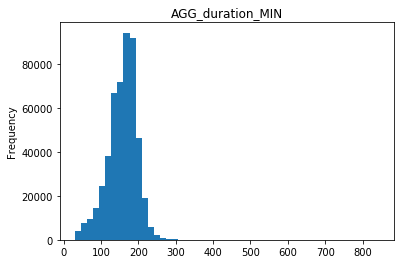

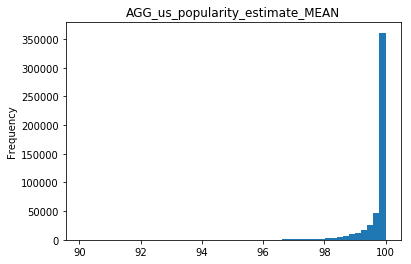

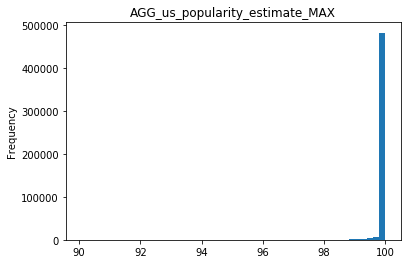

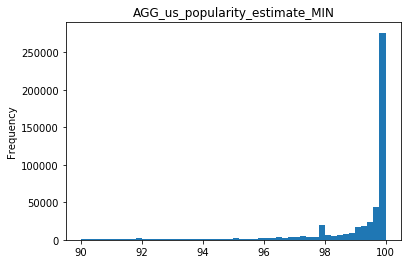

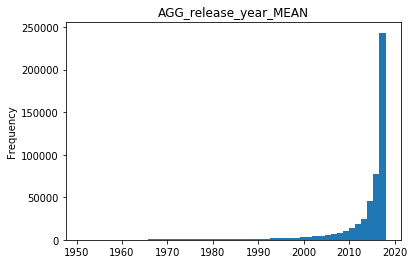

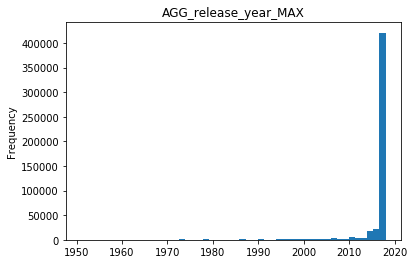

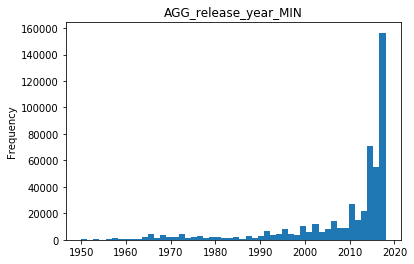

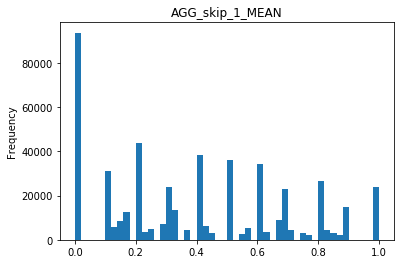

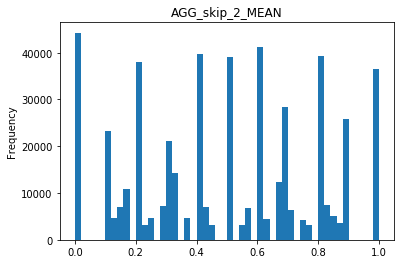

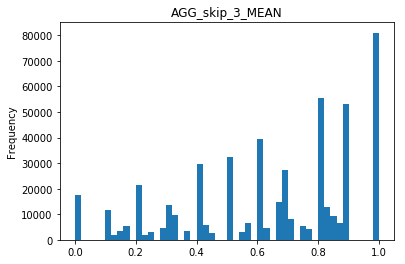

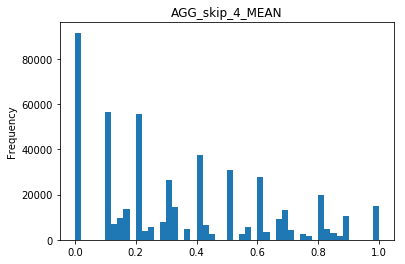

In [16]:
for c in X_trn.columns:
    X_trn[c].iloc[:500000].plot.hist(bins=50)
    plt.yscale('linear')
    plt.title(c)
    plt.show()

In [17]:
X_trn.head()

,session_length,skip_1,skip_2,skip_3,skip_4,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_is_shuffle,hour_of_day,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,hist_user_behavior_reason_end_not_start,skip_2_SUB_1,skip_3_SUB_2,skip_2_ADD_1,skip_3_ADD_2,skip_3_ADD_4,AGG_context_switch_MEAN,AGG_no_pause_before_play_MEAN,AGG_short_pause_before_play_MEAN,AGG_long_pause_before_play_MEAN,AGG_hist_user_behavior_is_shuffle_MEAN,AGG_duration_MEAN,AGG_duration_MAX,AGG_duration_MIN,AGG_us_popularity_estimate_MEAN,AGG_us_popularity_estimate_MAX,AGG_us_popularity_estimate_MIN,AGG_release_year_MEAN,AGG_release_year_MAX,AGG_release_year_MIN,AGG_skip_1_MEAN,AGG_skip_2_MEAN,AGG_skip_3_MEAN,AGG_skip_4_MEAN
0,20,1,1,1,0,0,1,0,0,1,16,1,1,2,2,60.000,2018,99.9375,0.332520,0.751465,0.843262,0.914062,14.460938,0.239258,1.041016,0.000413,4,0.119019,-8.593750,0.622070,1,0.355957,0.154663,100.250,4,0.257568,1,0,0,2,2,1,0.0,0.9,0.0,0.0,1.0,192.375,236.750,60.000,99.6875,100.0,97.2500,2018.000000,2018.0,2018.0,0.3,0.4,0.5,0.5
1,20,1,1,1,0,0,1,0,0,1,14,1,2,2,3,369.500,2004,98.7500,0.046844,0.324219,0.327393,0.555664,6.109375,0.974121,0.897949,0.134155,7,0.898926,-5.656250,0.407471,1,0.420410,0.140259,117.625,4,0.420654,0,0,0,2,2,1,0.0,0.8,0.0,0.1,1.0,352.000,885.500,142.375,97.3750,100.0,90.8750,1989.300049,2013.0,1957.0,0.6,0.7,0.7,0.0
2,20,1,1,1,0,0,1,0,0,0,19,1,3,2,3,313.500,2016,100.0000,0.337402,0.574219,0.611816,0.722168,9.093750,0.331299,1.056641,0.282715,8,0.145996,-7.789062,0.673828,0,0.331787,0.072571,144.000,4,0.102478,0,0,0,2,2,1,0.0,0.7,0.0,0.2,0.0,228.000,313.500,142.250,100.0000,100.0,100.0000,2015.800049,2018.0,2006.0,0.5,0.5,0.8,0.1
3,20,0,0,0,1,0,1,0,0,0,17,1,3,1,1,216.750,2015,100.0000,0.001658,0.555664,0.538086,0.734863,7.796875,0.831055,0.965332,0.216675,9,0.290527,-5.898438,0.932617,0,0.047791,0.033142,123.000,4,0.755859,1,0,0,0,0,1,0.0,0.3,0.0,0.6,0.0,202.125,235.375,157.125,99.9375,100.0,99.6250,2015.199951,2018.0,2006.0,0.7,0.7,0.7,0.3
4,11,0,0,0,1,0,1,0,0,0,13,1,2,2,1,173.125,2018,100.0000,0.006989,0.476562,0.425293,0.618652,6.421875,0.867188,0.981934,0.000001,0,0.202271,-4.914062,0.738770,0,0.184814,0.043854,98.000,4,0.579102,0,0,0,0,0,1,0.2,0.8,0.0,0.0,0.6,212.750,273.500,173.125,99.8125,100.0,99.5625,2017.800049,2018.0,2017.0,0.2,0.2,0.8,0.2


In [18]:
# y_competition_truth = get_y_truth(df_trn)

In [19]:
# y_competition_truth = pd.Series(y_competition_truth)

In [20]:
y_competition_truth = pd.concat([pd.read_hdf(f, key='df') for f in ys[:n_files]], axis=0)

In [21]:
X_trn.memory_usage(deep=True).sum()/1024**2

100.8039665222168

In [22]:
X_trk[0].memory_usage(deep=True).sum()/1024**2

324.9797821044922

# Train / early-stop split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
id_trn, id_stp, y_lists_trn, y_lists_stp = train_test_split(X_trn.index, y_competition_truth, test_size=0.10, random_state=314, shuffle=True)

# Train a baseline

In [25]:
import lightgbm as lgb
mdl = lgb.LGBMClassifier(max_depth=-1, min_child_samples=400, 
              random_state=314, silent=True, metric='None', 
              n_jobs=4, n_estimators=500, learning_rate=0.1,
              **{'colsample_bytree': 0.75, 'min_child_weight': 1, 
               'num_leaves': 20, 'subsample': 0.75}
             )

def learning_rate_decay_power_0995(current_iter):
    base_learning_rate = 0.15
    lr = base_learning_rate  * np.power(.998, current_iter)
    return lr if lr > 1e-2 else 1e-2

In [26]:
n_fit = None

In [27]:
# X = pd.concat([X_trn, X_trk[0]], axis=1)
# fit_params = {'eval_names': ['train', 'early_stop'],
#               'eval_set': [(X.loc[id_trn,:], y_trn[0].loc[id_trn]), 
#                            (X.loc[id_stp,:], y_trn[0].loc[id_stp])],
#               'eval_metric': 'binary_error',
#               'verbose':50, 'early_stopping_rounds':60,
#               'callbacks':[lgb.reset_parameter(learning_rate=learning_rate_decay_power_0995)]}

# mdl.fit(X.loc[id_trn,:].iloc[:n_fit], y_trn[0].loc[id_trn].iloc[:n_fit], **fit_params)

# prob_pred = mdl.predict_proba(X.loc[id_stp,:])[:,1]
# evaluate_model(prob_pred>0.55, y_lists_stp)

Training until validation scores don't improve for 60 rounds.
[50]	train's binary_error: 0.222138	early_stop's binary_error: 0.223387
[100]	train's binary_error: 0.220271	early_stop's binary_error: 0.22269
[150]	train's binary_error: 0.219232	early_stop's binary_error: 0.222449
[200]	train's binary_error: 0.218458	early_stop's binary_error: 0.222183
[250]	train's binary_error: 0.217842	early_stop's binary_error: 0.222259
[300]	train's binary_error: 0.217279	early_stop's binary_error: 0.22184
[350]	train's binary_error: 0.216695	early_stop's binary_error: 0.221625
[400]	train's binary_error: 0.2161	early_stop's binary_error: 0.221397
[450]	train's binary_error: 0.215637	early_stop's binary_error: 0.221321
Early stopping, best iteration is:
[421]	train's binary_error: 0.215875	early_stop's binary_error: 0.221093


(0.5559858922998713, 0.7776777677767777)

The list of features with 0 importance: 
['time_signature']


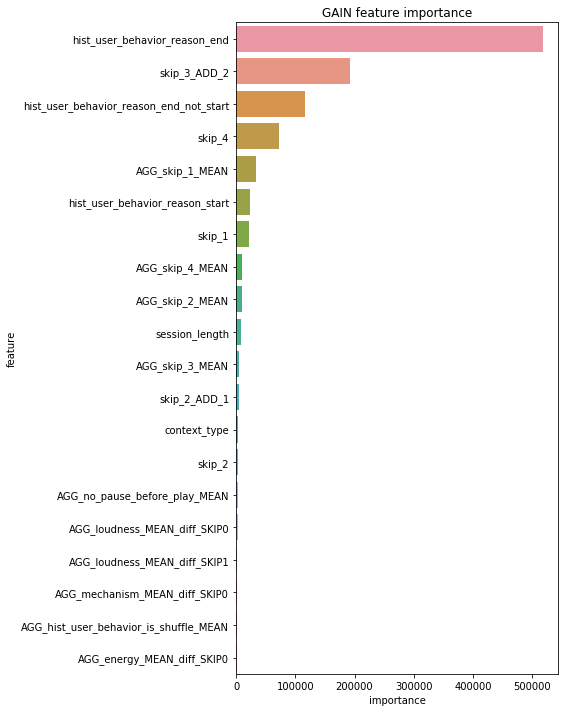

In [28]:
# kg.display_importances(pd.DataFrame({'feature': X.columns,
#                                   'importance': mdl.booster_.feature_importance('gain')}),
#                     n_feat=20,
#                     title='GAIN feature importance',
#                     fout_name='feature_importance_gain.png',   
#                     dump_strs=[])

# Make models for each song iteration

Training until validation scores don't improve for 60 rounds.
[100]	train's binary_error: 0.220271	early_stop's binary_error: 0.22269
[200]	train's binary_error: 0.218458	early_stop's binary_error: 0.222183
[300]	train's binary_error: 0.217279	early_stop's binary_error: 0.22184
[400]	train's binary_error: 0.2161	early_stop's binary_error: 0.221397
Early stopping, best iteration is:
[421]	train's binary_error: 0.215875	early_stop's binary_error: 0.221093
Constant prediction based on model trained on 0th event: AA=0.5546, FPA=0.7789
The list of features with 0 importance: 
['time_signature']
3251.10546875
Training until validation scores don't improve for 60 rounds.
[100]	train's binary_error: 0.295146	early_stop's binary_error: 0.296763
[200]	train's binary_error: 0.292432	early_stop's binary_error: 0.295863
[300]	train's binary_error: 0.290408	early_stop's binary_error: 0.2958
Early stopping, best iteration is:
[287]	train's binary_error: 0.290522	early_stop's binary_error: 0.295394
Co

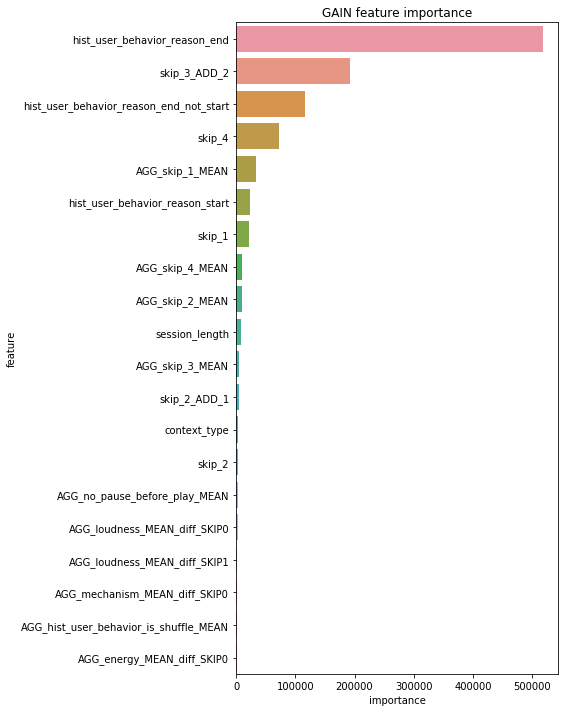

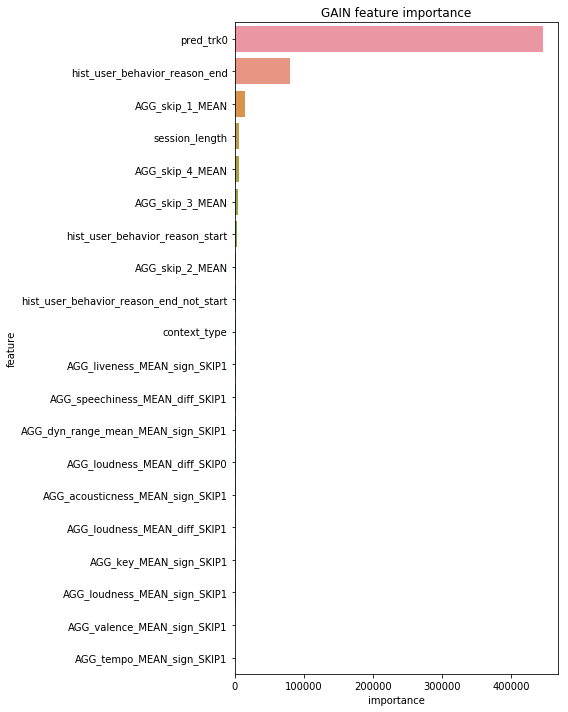

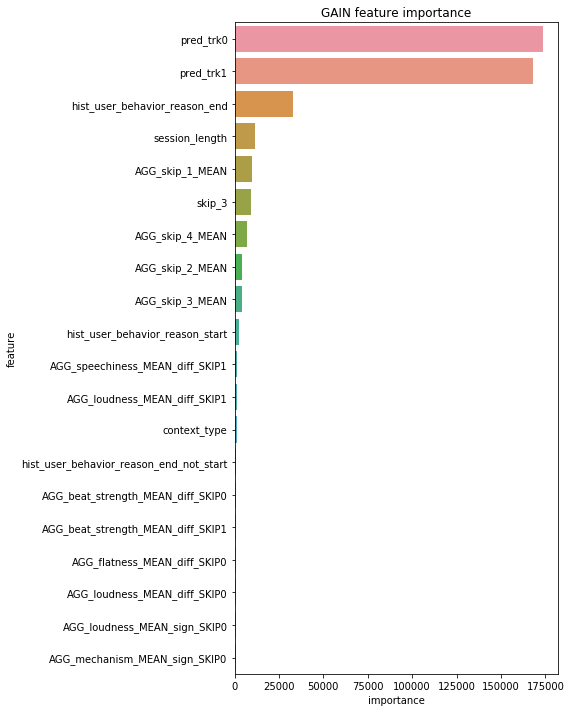

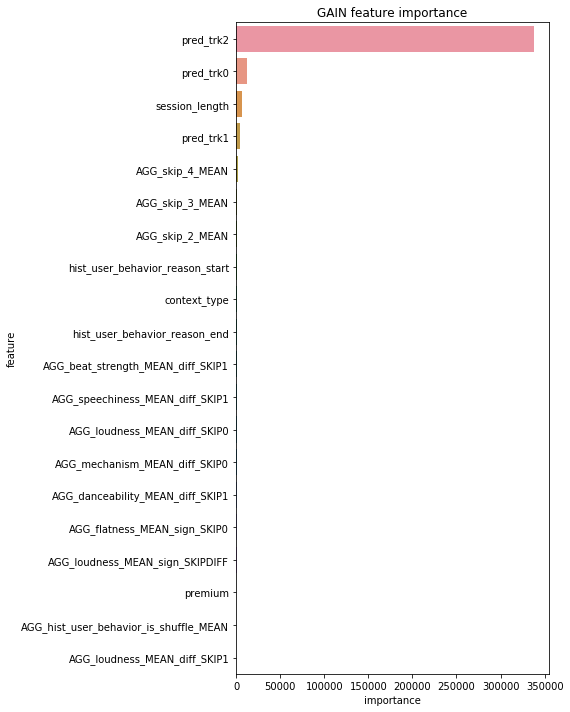

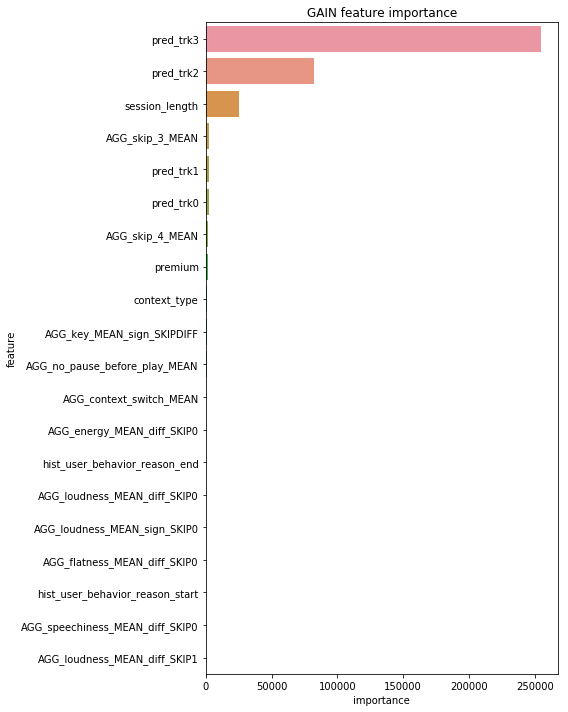

In [29]:
# fit_params = {'eval_names': ['train', 'early_stop'],
#               'eval_metric': 'binary_error',
#               'verbose':10, 'early_stopping_rounds':60,
#               'callbacks':[lgb.reset_parameter(learning_rate=learning_rate_decay_power_0995)]}

l_prob = []
X_prob=[]

for i_ in list(range(5)):
    X_trn, y_trn, X_trk = get_XY(df_trn.iloc[:], aggs, reset_index=True, 
                      list_musik_qualities_=list_musik_qualities,#['valence'], 
                      aggs_music_qualities_=aggs_music_qualities,
                             i_=i_)
    
    # for X_trk being produced centrally
    # i_trk = i_
    # for X_trk produced here in the loop
    i_trk = 0
    
    X = pd.concat([X_trn, X_trk[i_trk]], axis=1)
    if len(X_prob) > 0:
        X = pd.concat([X, pd.DataFrame({'pred_trk{}'.format(j): X_prob[j] 
                                        for j in range(len(X_prob))
                                       })],
                      axis=1)
    
    fit_params = {'eval_names': ['train', 'early_stop'],
                  'eval_set': [(X.loc[id_trn,:], y_trn[i_trk].loc[id_trn]), 
                               (X.loc[id_stp,:], y_trn[i_trk].loc[id_stp])],
                  'eval_metric': 'binary_error',
                  'verbose':100, 'early_stopping_rounds':60,
                  'callbacks':[lgb.reset_parameter(learning_rate=learning_rate_decay_power_0995)]}

    mdl.fit(X.loc[id_trn,:].iloc[:n_fit], 
            y_trn[i_trk].loc[id_trn].iloc[:n_fit], 
            **fit_params)

    #prediction for the validation/easly_stopping sample
    prob_pred = mdl.predict_proba(X.loc[id_stp,:])[:,1]
    
    # save full (trn+val) prediction to be used in modelling
    X_prob.append(mdl.predict_proba(X)[:,1])

    perf = evaluate_model(prob_pred>0.50, y_lists_stp)
    print('Constant prediction based on model trained on {}th event: AA={:.4f}, FPA={:.4f}'
          .format(i_, perf[0], perf[1])
         )
    
#     n_2print = 20
#     print(pd.DataFrame({'feature': X.columns,
#                   'importance': mdl.booster_.feature_importance('gain')}
#                 ).sort_values(
#         by="importance", ascending=False)[-n_2print:]
#          )
    
    kg.display_importances(pd.DataFrame({'feature': X.columns,
                                  'importance': mdl.booster_.feature_importance('gain')}),
                    n_feat=20,
                    title='GAIN feature importance',
                    fout_name='feature_importance_gain_{}.png'.format(i_),   
                    dump_strs=[])
    
#     # store the model
#     import joblib
#     joblib.dump(mdl, 'models/model_v2_m04_{}f_{}.pkl'.format(n_files, i_))
    
    l_prob.append(prob_pred)
    gc.collect()
    print(psutil.Process(os.getpid()).memory_info().rss / 1024**2)

## Competition metric on validation sample for different filling schemes

In [30]:
for i in range(len(l_prob)):
    perf = evaluate_set_of_models([l_prob[i_]>0.50 for i_ in range(i+1)], y_lists_stp, i_2fill=-2)
    print('AA={:.4f}, FPA={:.4f}: non-modeled based on {}'
          .format(perf[0], perf[1], i))

AA=0.5546, FPA=0.7789: non-modeled based on 0
AA=0.5619, FPA=0.7789: non-modeled based on 1
AA=0.5651, FPA=0.7789: non-modeled based on 2
AA=0.5691, FPA=0.7789: non-modeled based on 3
AA=0.5722, FPA=0.7789: non-modeled based on 4


In [31]:
# preds_lists_full = pred_series_of_lists([p>0.50 for p in X_prob], y_competition_truth.apply(len), i_2fill=-2)

In [32]:
# preds_lists_full.head(20)

## Competition metric on the full (trn+val) sample for different number of predictions

In [33]:
# for i in range(len(X_prob)):
#     perf = evaluate_set_of_models([X_prob[i_]>0.50 for i_ in range(i+1)], y_competition_truth, i_2fill=-2)
#     print('AA={:.4f}, FPA={:.4f}: non-modeled based on {}'
#           .format(perf[0], perf[1], i))

# Make single model to predict for all songs

In [34]:
# X_trn, y_trn = get_XY(df_trn.iloc[:], aggs, reset_index=True, 
#                       list_musik_qualities_=list_musik_qualities,#['valence'], 
#                       aggs_music_qualities_=aggs_music_qualities,
#                        i_=0)
# X_trn, X_stp, y_trn, y_stp = train_test_split(X_trn, y_trn, test_size=0.10, random_state=314, shuffle=True)

# fit_params['eval_set'] = [(X_trn,y_trn), (X_stp,y_stp)]
# mdl.fit(X_trn.iloc[:n_fit], y_trn.iloc[:n_fit], **fit_params)

# l_prob_2 = []

# for i in range(5):
#     X_trn, y_trn = get_XY(df_trn.iloc[:], aggs, reset_index=True, 
#                       list_musik_qualities_=list_musik_qualities,#['valence'], 
#                       aggs_music_qualities_=aggs_music_qualities,
#                        i_=i)
#     X_trn, X_stp, y_trn, y_stp = train_test_split(X_trn, y_trn, test_size=0.10, random_state=314, shuffle=True)

#     prob_pred = mdl.predict_proba(X_stp)[:,1]
#     perf = evaluate_model(prob_pred>0.55, y_lists_stp)
#     print('Competition metric with a constant prediction\
#             based on model trained on {}th event: AA={:.4f}, FPA={:.4f}'
#           .format(i, perf[0], perf[1])
#          )
#     l_prob_2.append(prob_pred)

In [35]:
# for i in range(len(l_prob_2)):
#     perf = evaluate_set_of_models([p>0.50 for p in l_prob_2], y_lists_stp, i_2fill=i)
#     print('AA={:.4f}, FPA={:.4f}: non-modeled based on {}'
#           .format(perf[0], perf[1], i))